In [1]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

funnel_config = set_task(funnel_config, "funnel")
funnel_config.model.reference_process_key = "oudstl"

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 11000
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.95 # For funnel

In [3]:
funnel_config.model.reference_process_key 

'oudstl'

In [4]:
funnel_config.model.input_dim

10

In [5]:
funnel_config.model.step_scheme_key

'cos_sq'

In [6]:
funnel_config.model.ts.shape

(128,)

In [7]:
funnel_config.trainer.epochs = 50#2000
out_dict = train_dds(funnel_config)

False 2
False 2
('epoch: %s %s  loss: %s', 0, 'TRAIN', 2.5528948307037354)
('epoch: %s %s  loss: %s', 1, 'TRAIN', 1.6063863039016724)
('epoch: %s %s  loss: %s', 2, 'TRAIN', 1.4450738430023193)
('epoch: %s %s  loss: %s', 3, 'TRAIN', 1.330682396888733)
('epoch: %s %s  loss: %s', 4, 'TRAIN', 1.2804526090621948)
('epoch: %s %s  loss: %s', 5, 'TRAIN', 1.1104289293289185)
('epoch: %s %s  loss: %s', 6, 'TRAIN', 1.0332764387130737)
('epoch: %s %s  loss: %s', 7, 'TRAIN', 1.0908764600753784)
('epoch: %s %s  loss: %s', 8, 'TRAIN', 0.9631279706954956)
('epoch: %s %s  loss: %s', 9, 'TRAIN', 0.9785577058792114)
('epoch: %s %s  loss: %s', 10, 'TRAIN', 0.9136996269226074)
('epoch: %s %s  loss: %s', 11, 'TRAIN', 0.7564541101455688)
('epoch: %s %s  loss: %s', 12, 'TRAIN', 0.813339114189148)
('epoch: %s %s  loss: %s', 13, 'TRAIN', 0.7305457592010498)
('epoch: %s %s  loss: %s', 14, 'TRAIN', 0.7182541489601135)
('epoch: %s %s  loss: %s', 15, 'TRAIN', 0.7553374767303467)
('epoch: %s %s  loss: %s', 16, 'TRAI

In [8]:
out_dict[-1].keys()

dict_keys(['elbo', 'is', 'pf', 'elbo_eval', 'is_eval', 'pf_eval', 'aug', 'aug_ode', 'aug_ode_ext'])

In [9]:
onp.mean(out_dict[-1]["is_eval"])

0.05398688316345215

In [10]:
onp.mean(out_dict[-1]["pf_eval"])

-0.4230666478474935

In [11]:
out_dict[-1]["pf_eval"]

[-0.2731752395629883,
 -0.48299694061279297,
 -0.49959468841552734,
 -0.4036426544189453,
 -0.37833499908447266,
 -0.3362746238708496,
 -0.383544921875,
 -0.5553741455078125,
 -0.5335216522216797,
 -0.22673797607421875,
 -0.7252883911132812,
 -0.3538985252380371,
 -0.4698638916015625,
 -0.5182437896728516,
 -0.3121523857116699,
 -0.47576236724853516,
 -0.4366302490234375,
 -0.4948873519897461,
 -0.39789867401123047,
 -0.4213428497314453,
 -0.46666908264160156,
 -0.2848377227783203,
 -0.526911735534668,
 -0.43596839904785156,
 -0.3050107955932617,
 -0.4584159851074219,
 -0.3768606185913086,
 -0.3468437194824219,
 -0.45680904388427734,
 -0.3545060157775879]

In [12]:
funnel_config.model.reference_process_key

'oudstl'

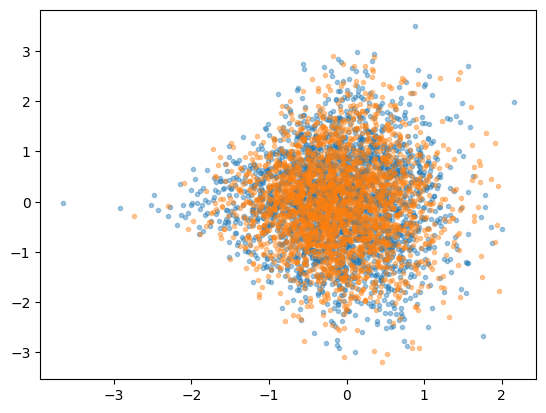

In [13]:
import matplotlib.pyplot as plt

ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

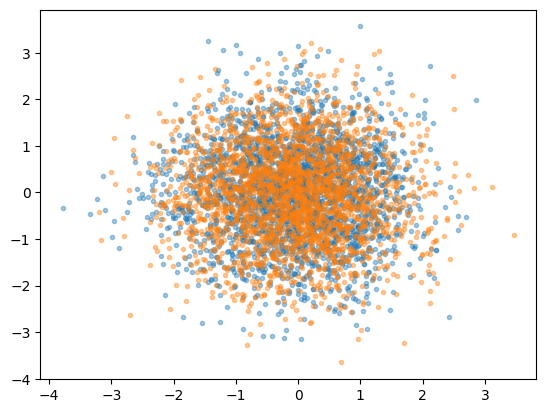

In [14]:
import matplotlib.pyplot as plt

timestep = 40

ode_targ = out_dict[-1]["aug_ode"][:, timestep,:2]
sde_targ = out_dict[-1]["aug"][:, timestep,:2]

plt.plot(ode_targ[:, 0], ode_targ[:, 1], ".", alpha=0.4)
plt.plot(sde_targ[:, 0], sde_targ[:, 1], ".", alpha=0.4)

In [15]:
cake = funnel_config.trainer.lnz_pf_estimator(
    out_dict[-1]["aug_ode"], funnel_config.model.source, funnel_config.model.target, debug=False)

In [16]:
cake

Array(-1.1946077, dtype=float32)

In [17]:
funnel_config.model.target(out_dict[-1]["aug_ode"][:, -1,:10]).mean()

Array(-13.566745, dtype=float32)

In [18]:
funnel_config.model.source(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

Array(-14.894422, dtype=float32)

In [19]:
import distrax
import numpy as np

equi_normal2 = distrax.MultivariateNormalDiag( np.zeros(10) , funnel_config.model.sigma * np.ones(10))

equi_normal2.log_prob(out_dict[-1]["aug_ode"][:, 0,:10]).mean()

Array(-14.894422, dtype=float32)

In [20]:
funnel_config

{'dataset': {}, 'eval': {'seeds': 30}, 'model': {'activation': <function gelu at 0x28ab5a8c0>, 'activation_dict': {'gelu': <function gelu at 0x28ab5a8c0>, 'relu': <jax._src.custom_derivatives.custom_jvp object at 0x116a6ded0>, 'swish': <PjitFunction of <function silu at 0x116a71b40>>}, 'activation_key': 'gelu', 'alpha': 0.6875, 'batch_size': 300, 'detach_path': False, 'detach_stl_drift': False, 'dt': 0.05, 'elbo_batch_size': 2000, 'exp_dds': False, 'fully_connected_units': [64, 64], 'input_dim': 10, 'learn_betas': False, 'log': False, 'm': 1.0, 'network_dict': {'pis': <class 'dds.drift_nets.PISGRADNet'>, 'pisudp': <class 'dds.drift_nets_udp.UDPPISGRADNet'>, 'vanilla': <class 'dds.drift_nets.SimpleDriftNet'>, 'vanilla_udp': <class 'dds.drift_nets_udp.UDPSimpleDriftNet'>}, 'network_key': 'pis', 'reference_process_dict': {'oudstl': <class 'dds.stl_samplers.AugmentedOUDFollmerSDESTL'>, 'oududp': <class 'dds.udp_samplers.AugmentedOUDFollmerSDEUDP'>, 'oustl': <class 'dds.stl_samplers.Augment